In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [76]:
import uuid
from datetime import datetime, timedelta
from random import randrange


class UserGenerator:
    def __init__(
        self,
        n_users: int,
        n_interactions: int,
        start_dt: datetime,
        end_dt: datetime,
    ):
        self.n_users = n_users
        self.n_interactions = n_interactions
        self.start_dt = start_dt
        self.end_dt = end_dt
        
        self.balance = np.random.exponential(scale=100, size=self.n_users)
        self.target_balance = np.array(
            [np.random.normal(b, 10) for b in self.balance]
        )

    def get_interactions(self, balance, target_balance):
        tmp = np.random.uniform(-balance/n_interactions, balance/n_interactions, size=n_interactions)
        tmp = tmp / np.sum(tmp, axis=0) *  (target_balance - balance)
        return tmp

    @staticmethod
    def get_random_date(start: datetime, end: datetime) -> datetime:
        delta = end - start
        int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
        random_second = randrange(int_delta)
        return start + timedelta(seconds=random_second)

    
    def generate_data(self):
        columns = ["user_id", "user_balance", "interaction", "date", "type"]
        data = []
        
        for i in range(self.n_users):
            user_id = uuid.uuid4()
            user_balance = self.balance[i]
            user_target_balance = self.target_balance[i]
                        
            user_interactions = self.get_interactions(user_balance, user_target_balance)
            row = [user_id, user_balance, None, self.start_dt, "registration"]
            data.append(row)
            
            for j in range(1, self.n_interactions):
                date = self.get_random_date(self.start_dt, self.end_dt)
                interaction = user_interactions[j]
                user_balance += interaction
                row = [user_id, user_balance, interaction, date, "transaction"]
                data.append(row)
        df = pd.DataFrame(data, columns=columns).sort_values(by="date")
        return df
                    

In [77]:
n_users = 100
n_interactions = 10
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")


In [115]:
ug = UserGenerator(n_users, n_interactions, start_dt, end_dt)

In [116]:
df = ug.generate_data()

In [117]:
df.head(10)

,user_id,user_balance,interaction,date,type
0,996b4630-4578-4699-b57c-56bdb2d3b993,11.848673,NaN,2023-01-01,registration
460,2c2342b5-dfd9-45bc-858d-ffc5e1afd02f,4.788190,NaN,2023-01-01,registration
670,274dce22-dea5-496d-a45f-f8894049f6be,34.500012,NaN,2023-01-01,registration
800,31175e3d-cee7-434a-b685-b3c4a28eb084,278.098986,NaN,2023-01-01,registration
550,fa4f88d7-0393-4424-be28-3a7b43966c43,44.036173,NaN,2023-01-01,registration
870,a832ffa8-5cf9-48e4-b252-30e7ac9b876b,214.475533,NaN,2023-01-01,registration
450,141120dc-4537-4350-a89e-290613330aad,27.550275,NaN,2023-01-01,registration
70,4316a456-ec06-49c4-9248-821338e145c4,18.448764,NaN,2023-01-01,registration
260,16392b30-3057-407a-bdda-80d7cdbc9ab6,180.058818,NaN,2023-01-01,registration
130,024fe55b-33cd-48c9-ba90-64821ddea891,239.622935,NaN,2023-01-01,registration


In [118]:
user_id = df["user_id"].unique()[0]
mask = (df["type"] == "registration")
user_df = df[mask]
user_df.head(5)

,user_id,user_balance,interaction,date,type
0,996b4630-4578-4699-b57c-56bdb2d3b993,11.848673,NaN,2023-01-01,registration
460,2c2342b5-dfd9-45bc-858d-ffc5e1afd02f,4.788190,NaN,2023-01-01,registration
670,274dce22-dea5-496d-a45f-f8894049f6be,34.500012,NaN,2023-01-01,registration
800,31175e3d-cee7-434a-b685-b3c4a28eb084,278.098986,NaN,2023-01-01,registration
550,fa4f88d7-0393-4424-be28-3a7b43966c43,44.036173,NaN,2023-01-01,registration


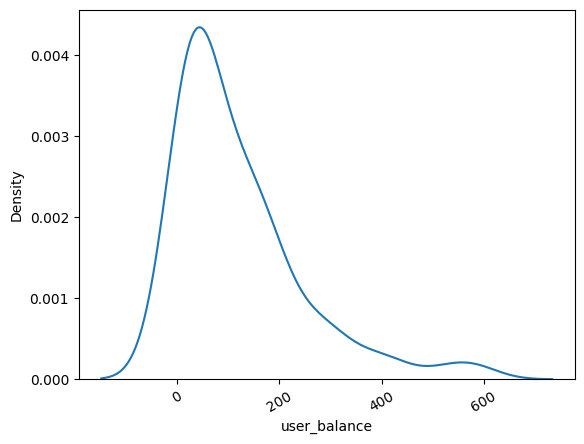

In [119]:
g = sns.kdeplot(x="user_balance", data=user_df)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [120]:
df_last = df.sort_values(by="date").groupby(by="user_id").tail(1)

In [121]:
df_last.head()

,user_id,user_balance,interaction,date,type
322,f75f28d5-2d87-4781-a9cb-883573ce67f1,3.317042,-4.923364,2023-01-15 09:48:05,transaction
765,564a2eaa-3e46-4350-8376-89bbe1f37ebd,124.779161,0.226537,2023-01-18 04:54:34,transaction
748,53d9ad53-08df-4699-8439-606345611afe,35.044661,-0.102130,2023-01-19 01:14:45,transaction
845,bf908187-934e-4e4c-86f6-7dce5a31f086,32.526821,1.579173,2023-01-20 01:29:11,transaction
606,02ebb3ad-9825-4089-a237-bde01be1f4c4,-214.868341,35.756126,2023-01-20 17:03:28,transaction


In [122]:
df_last.nunique()

user_id         100
user_balance    100
interaction     100
date            100
type              1
dtype: int64

In [123]:
df_last.shape

(100, 5)

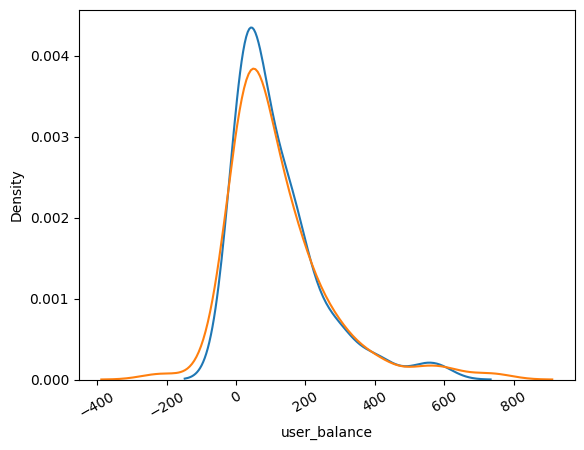

In [124]:
g = sns.kdeplot(x="user_balance", data=user_df)

g = sns.kdeplot(x="user_balance", data=df_last)
tmp = g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [126]:
print(f"MEAN Before: {np.mean(user_df['user_balance'])}")
print(f"MEAN After: {np.mean(df_last['user_balance'])}")


MEAN Before: 119.31460118880304
MEAN After: 120.55483790442618


In [ ]:
есть баланс B, юзер должен совершит N сделок. В итоге у него должно быть B_new денег на балансе.
Как выбирать сколько денег получит человек в той или иной сделке?
составим массив разностей [d0, d1, d2, ..., dN].
сначала сгенерим число из равномерного распределения [-d_k, d_k] forall k.


In [24]:
def gen_interactions(n_interactions, balance, target_balance):
    tmp = np.random.uniform(-totals, totals, size=n_interactions)
    tmp = tmp / np.sum(tmp, axis=0) *  (target_balance - balance)
    return tmp
    

In [30]:
a = gen_interactions(10, 10, 6)
print(a)
print(f"sum a = {a.sum()}")

[-13.51306057   8.61852764   6.76310243  13.42868175  -6.88037264
  -7.62779631  -3.01491506  -5.63973697   1.4980721    2.36749762]
sum a = -4.000000000000002
